In [1]:
import pandas as pd
import os

MIRNA_PATH = "../../datasets/miRNA_seq"
MIRNA_JSON_PATH = "../../datasets/miRNA(json&manifest)/files.2024-12-12.json"

# miRNA_seq

In [3]:
# Check if all file in all sub folder od datasets/miRNA_seq terminate with mirnas.quantification.txt
count_not_mirnas_quantification_txt = 0
for subfolder in os.listdir(MIRNA_PATH):
    for file in os.listdir(f"{MIRNA_PATH}/{subfolder}"):
        if not file.endswith("mirnas.quantification.txt"):
            count_not_mirnas_quantification_txt+=1
            print(f"File {file} in folder {subfolder} does not end with mirnas.quantification.txt")

print("\n---------------------------------------------------------------")
print(f"Number of files not ending with mirnas.quantification.txt: {count_not_mirnas_quantification_txt}")
print("-----------------------------------------------------------------")

File annotations.txt in folder 1d46b67b-8c6d-4a85-a837-30f54d45dce9 does not end with mirnas.quantification.txt
File logs in folder 1d46b67b-8c6d-4a85-a837-30f54d45dce9 does not end with mirnas.quantification.txt
File annotations.txt in folder 2272a72a-201e-4e84-b4fb-5e20939e0fa9 does not end with mirnas.quantification.txt
File logs in folder 2272a72a-201e-4e84-b4fb-5e20939e0fa9 does not end with mirnas.quantification.txt
File annotations.txt in folder 22bbada8-1c32-4c82-8bf0-3d71dce76841 does not end with mirnas.quantification.txt
File logs in folder 22bbada8-1c32-4c82-8bf0-3d71dce76841 does not end with mirnas.quantification.txt
File annotations.txt in folder 26094c76-21b8-4583-aeb4-3bbad0da7f29 does not end with mirnas.quantification.txt
File logs in folder 26094c76-21b8-4583-aeb4-3bbad0da7f29 does not end with mirnas.quantification.txt
File annotations.txt in folder 28c996b2-5e2d-4a48-a4e0-dd910f8599ab does not end with mirnas.quantification.txt
File logs in folder 28c996b2-5e2d-4a

Files not ending with mirnas.quantification.txt are logs or annotations.xml, so they can be ignored.

In [4]:
def import_txt(file_path):
    temp_df = pd.read_csv(file_path, sep="\t")
    if 'reads_per_million_miRNA_mapped' in temp_df.columns:
        temp_df = temp_df[["read_count", "reads_per_million_miRNA_mapped"]]
        temp_df = temp_df.dropna(how='all')
        return temp_df
    return None

def miRNA_process():
    count_subfolders = 0
    df = pd.DataFrame(columns=["folder_name", "file_name", "read_count", "reads_per_million_miRNA_mapped"])
    for subfolder in os.listdir(MIRNA_PATH):
        count_subfolders += 1
        for file in os.listdir(f"{MIRNA_PATH}/{subfolder}"):
            if file.endswith(".txt") and file != "annotations.xml":
                selected_data = import_txt(f"{MIRNA_PATH}/{subfolder}/{file}")

                if selected_data is not None:
                    selected_data.insert(0, "file_name", file)
                    selected_data.insert(0, "folder_name", subfolder)

                    # Safe concatenation avoiding empty DataFrames or with NaN values
                    if not selected_data.empty and not selected_data.isna().all().all():
                        df = pd.concat([df, selected_data], ignore_index=True)
    print(f"Subfolders: {count_subfolders}")
    return df
miRNA_seq_df = miRNA_process()

C:\Users\giorg\AppData\Local\Temp\ipykernel_24920\1695826995.py:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, selected_data], ignore_index=True)


Subfolders: 767


**All folders contribute to the final DataFrame**

In [19]:
print(miRNA_seq_df.head(5))

                            folder_name  \
0  01626fb9-a7f7-4324-97f2-ef2fee03f3c7   
1  01626fb9-a7f7-4324-97f2-ef2fee03f3c7   
2  01626fb9-a7f7-4324-97f2-ef2fee03f3c7   
3  01626fb9-a7f7-4324-97f2-ef2fee03f3c7   
4  01626fb9-a7f7-4324-97f2-ef2fee03f3c7   

                                           file_name read_count  \
0  e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...       7173   
1  e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...       7453   
2  e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...       7475   
3  e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...      18096   
4  e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...       1947   

   reads_per_million_miRNA_mapped  
0                     5652.188302  
1                     5872.823005  
2                     5890.158589  
3                    14259.305663  
4                     1534.199167  


In [5]:
miRNA_seq_df.shape

(1442727, 4)

In [30]:
miRNA_seq_df.isna().sum()

folder_name                       0
file_name                         0
read_count                        0
reads_per_million_miRNA_mapped    0
dtype: int64

In [27]:
miRNA_seq_df.dtypes

folder_name                        object
file_name                          object
read_count                         object
reads_per_million_miRNA_mapped    float64
dtype: object

We can see that RC is object datatype. We convert it in float64

In [29]:
miRNA_seq_df['read_count'] = miRNA_seq_df['read_count'].astype(float)

In [33]:
miRNA_seq_df.describe()

,read_count,reads_per_million_miRNA_mapped
count,1442727.00,1442727.00
mean,1621.85,531.63
std,30985.08,8026.86
min,0.00,0.00
25%,0.00,0.00
50%,0.00,0.00
75%,1.00,0.50
max,5523424.00,679286.45


### Plot RC and RPM distributions

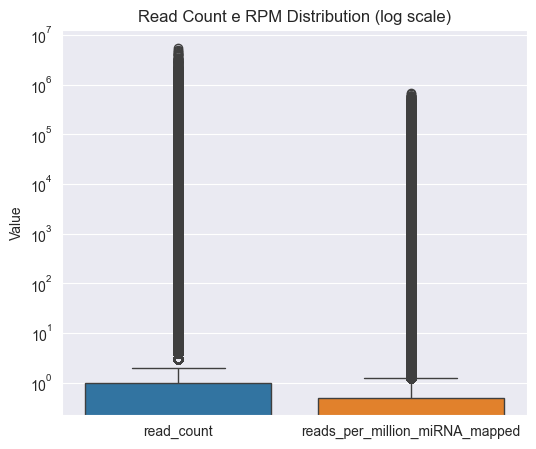

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
sns.boxplot(data=miRNA_seq_df[['read_count', 'reads_per_million_miRNA_mapped']])
plt.yscale('log')
plt.title("Read Count e RPM Distribution (log scale)")
plt.ylabel("Value")
plt.show()


### Aggregate by file name

In [13]:
simplified_miRNA_df = miRNA_seq_df.groupby(
    ['folder_name', 'file_name']
).agg({'reads_per_million_miRNA_mapped': list}).reset_index()

simplified_miRNA_df.shape

AttributeError: 'DataFrame' object has no attribute 'shapeplt'

In [9]:
simplified_miRNA_df['list_length'] = simplified_miRNA_df['reads_per_million_miRNA_mapped'].apply(len)
print(simplified_miRNA_df['list_length'].to_list())

[1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 1881, 188

All files have **1881** miRNA values

In [10]:
simplified_miRNA_df.head()

,folder_name,file_name,reads_per_million_miRNA_mapped,list_length
0,01626fb9-a7f7-4324-97f2-ef2fee03f3c7,e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...,"[5652.188302, 5872.823005, 5890.158589, 14259....",1881
1,016db033-3cec-4c63-b90f-0428da475a63,f46e1aef-c572-4651-964d-a0a9bc7a1128.mirbase21...,"[8395.099993, 8287.749902, 8330.52851, 20291.5...",1881
2,0173d27e-ff23-42b2-afb9-9b867ace3efc,bc1018a6-62f3-4386-a545-9fa8a31a2e96.mirbase21...,"[19889.387965, 19847.305155, 19961.06025, 1472...",1881
3,0195917c-c127-4523-aff3-9e64ebdd4363,75134cfe-bc9d-4838-9a88-2ef2200b34ec.mirbase21...,"[13142.168087, 13137.975295, 13098.004007, 445...",1881
4,046b15a8-38d3-41fc-b55f-04dd591a8e14,ad7d6f10-1dff-4bc8-a8c3-0b6ce7b45366.mirbase21...,"[10511.654941, 10471.07787, 10569.778855, 2060...",1881


### Check if all miRNA IDs are in the same order in all files

In [11]:
import pandas as pd
import os

def import_txt(file_path):
    temp_df = pd.read_csv(file_path, sep="\t")
    if 'miRNA_ID' in temp_df.columns:
        temp_df = temp_df[["miRNA_ID"]]
        temp_df = temp_df.dropna(how='all')
        return temp_df
    return None

def check_column_order():
    reference_order = None
    mismatches = []

    for subfolder in os.listdir(MIRNA_PATH):
        for file in os.listdir(f"{MIRNA_PATH}/{subfolder}"):
            if file.endswith(".txt") and file != "annotations.xml":
                df = import_txt(f"{MIRNA_PATH}/{subfolder}/{file}")
                if df is not None and not df.empty:
                    current_order = df['miRNA_ID'].tolist()
                    if reference_order is None:
                        reference_order = current_order
                    elif current_order != reference_order:
                        mismatches.append(f"{subfolder}/{file}")

    if len(mismatches) == 0:
        print("---------------------------------------------------")
        print("-> All files have the miRNA IDs in the same order.")
        print("---------------------------------------------------")
    else:
        print("-----------------------------------------------")
        print("-> Files with mismatched miRNA ID order:")
        for f in mismatches:
            print(f)        
        print("-----------------------------------------------")

check_column_order()

---------------------------------------------------
-> All files have the miRNA IDs in the same order.
---------------------------------------------------


# miRNA JSON

In [12]:
df_miRNA_json = pd.read_json(MIRNA_JSON_PATH)
print(df_miRNA_json.columns)

Index(['data_format', 'cases', 'access', 'file_name', 'file_id', 'data_type',
       'data_category', 'experimental_strategy', 'platform', 'file_size',
       'annotations'],
      dtype='object')


In [13]:
print(f"'data_category' unique: {df_miRNA_json['data_category'].unique()}")
print(df_miRNA_json['data_format'].unique())
print(df_miRNA_json.shape)

                                               cases  \
0  [{'case_id': '1c3610f7-e0aa-48d7-9a27-0dbaf6e2...   
1  [{'case_id': '241fffc8-4250-4cfa-b2e7-e68c33ae...   
2  [{'case_id': 'e5aae05a-478e-4a55-a27c-12b2b4be...   
3  [{'case_id': 'b7f74ae1-6f58-447c-be50-a7666eb1...   
4  [{'case_id': 'e7a00d67-2c26-4d1f-bd17-35f659e8...   

                                           file_name  
0  a8c7bebe-a450-4a3e-b891-e2d4ac578b04.mirbase21...  
1  97cb5037-7eea-4ba7-86c3-d13dd91e5b1e.mirbase21...  
2  6bd02673-dd3f-42ed-9997-e371b09f22ee.mirbase21...  
3  f846c0ad-9bbd-46a5-a678-fc3c05cdcc41.mirbase21...  
4  fe712c27-8dbb-4531-afb3-10999e319a7b.mirbase21...  
0    [{'case_id': '1c3610f7-e0aa-48d7-9a27-0dbaf6e2...
1    [{'case_id': '241fffc8-4250-4cfa-b2e7-e68c33ae...
2    [{'case_id': 'e5aae05a-478e-4a55-a27c-12b2b4be...
3    [{'case_id': 'b7f74ae1-6f58-447c-be50-a7666eb1...
4    [{'case_id': 'e7a00d67-2c26-4d1f-bd17-35f659e8...
Name: cases, dtype: object
'data_category' unique: ['Trans

All files are of data_category **'Transcriptome Profiling'** and data_format **'TXT'**.

### Explore 'cases' field to extract 'case_id' and 'project.project_id'

In [14]:
print(df_miRNA_json[['cases', 'file_name']].shape)
df_miRNA_json[['cases', 'file_name']].head(1)

(767, 2)


,cases,file_name
0,[{'case_id': '1c3610f7-e0aa-48d7-9a27-0dbaf6e2...,a8c7bebe-a450-4a3e-b891-e2d4ac578b04.mirbase21...


In [15]:
cases_expanded = df_miRNA_json['cases'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else {})
unique_projects = pd.json_normalize(cases_expanded)['project.project_id'].unique()

print("Unique project IDs:", unique_projects)

Unique project IDs: ['TCGA-BRCA']


In [16]:
df_miRNA_json['case_id'] = df_miRNA_json['cases'].apply(
    lambda x: x[0]['case_id'] if isinstance(x, list) and len(x) > 0 and 'case_id' in x[0] else None
)

print(df_miRNA_json[['case_id', 'file_name']].head())

                                case_id  \
0  1c3610f7-e0aa-48d7-9a27-0dbaf6e244f9   
1  241fffc8-4250-4cfa-b2e7-e68c33ae07dc   
2  e5aae05a-478e-4a55-a27c-12b2b4be302a   
3  b7f74ae1-6f58-447c-be50-a7666eb19d9a   
4  e7a00d67-2c26-4d1f-bd17-35f659e88bc1   

                                           file_name  
0  a8c7bebe-a450-4a3e-b891-e2d4ac578b04.mirbase21...  
1  97cb5037-7eea-4ba7-86c3-d13dd91e5b1e.mirbase21...  
2  6bd02673-dd3f-42ed-9997-e371b09f22ee.mirbase21...  
3  f846c0ad-9bbd-46a5-a678-fc3c05cdcc41.mirbase21...  
4  fe712c27-8dbb-4531-afb3-10999e319a7b.mirbase21...  


# Merge miRNA data with miRNA JSON on file_name

In [17]:
miRNA_merged_df = pd.merge(simplified_miRNA_df, df_miRNA_json[['case_id', 'file_name']], on='file_name', how='inner')
miRNA_merged_df.head()

,folder_name,file_name,reads_per_million_miRNA_mapped,list_length,case_id
0,01626fb9-a7f7-4324-97f2-ef2fee03f3c7,e7b7bf36-aa58-4dc0-8548-a28c11d5060f.mirbase21...,"[5652.188302, 5872.823005, 5890.158589, 14259....",1881,e6b79d7a-ed6b-459a-b040-d142616e7ab4
1,016db033-3cec-4c63-b90f-0428da475a63,f46e1aef-c572-4651-964d-a0a9bc7a1128.mirbase21...,"[8395.099993, 8287.749902, 8330.52851, 20291.5...",1881,09c2bc35-c21f-4aa4-ac30-0d8db02ad811
2,0173d27e-ff23-42b2-afb9-9b867ace3efc,bc1018a6-62f3-4386-a545-9fa8a31a2e96.mirbase21...,"[19889.387965, 19847.305155, 19961.06025, 1472...",1881,08de63a2-7b76-43c3-80dc-df748b1d81bc
3,0195917c-c127-4523-aff3-9e64ebdd4363,75134cfe-bc9d-4838-9a88-2ef2200b34ec.mirbase21...,"[13142.168087, 13137.975295, 13098.004007, 445...",1881,d071c16b-7cee-45ed-8ec9-612418143815
4,046b15a8-38d3-41fc-b55f-04dd591a8e14,ad7d6f10-1dff-4bc8-a8c3-0b6ce7b45366.mirbase21...,"[10511.654941, 10471.07787, 10569.778855, 2060...",1881,49717f75-0f2d-4e1c-9a12-f1cd7877b80a


In [18]:
miRNA_merged_df.shape

(767, 5)

In [19]:
# find 378778d2-b331-4867-a93b-c64028c8b4c7 case id 
miRNA_merged_df[miRNA_merged_df['case_id'] == '378778d2-b331-4867-a93b-c64028c8b4c7']

,folder_name,file_name,reads_per_million_miRNA_mapped,list_length,case_id
568,c2cf4ba8-f4c8-4be0-b61a-2e3bd8119638,ceed6c37-0a34-42e8-98a6-5e3626e62c2f.mirbase21...,"[7988.580442, 8018.197889, 8100.662153, 32345....",1881,378778d2-b331-4867-a93b-c64028c8b4c7
